In [14]:
import pandas as pd  #pandas用于数据清洗
import numpy as np  #numpy用于矩阵运算
import matplotlib.pyplot as plt  #matplotlib用于作图，分析数据
import seaborn as sns  #seaborn用于高级作图，数据可视化
import re  #python中的正则表达式包
import patsy
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.font_manager import FontProperties  #用于为matplotlib设置中文字体

#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

数据分析

In [15]:
raw_data = pd.read_excel('expances.xlsx', 'sheet1', index_col='userid', na_values=['#N/A'])
car_info = pd.read_csv('car_info_from_expances', index_col='userid')

In [16]:
raw_data = raw_data.drop(raw_data.columns[0:4], axis=1)
car_info = car_info.drop(car_info.columns[0:3], axis=1)
car_info = car_info.drop(['报价'], axis=1)

#expances = pd.merge(car_info, raw_data, on='userid')

In [17]:
expances = pd.merge(car_info, raw_data, on='userid')
expances = expances.drop(['最高报价'], axis=1)
#expances

In [18]:
#sns.pairplot(expances, x_vars=expances.columns[:2], y_vars=expances.columns[2:], hue='性别');

In [19]:
expances.fillna(0, inplace=True)
columns = expances.columns
index = []
for i in range(len(columns)):
    if expances[columns[i]].dtype == 'O':
        index.append(columns[i])
columns = columns.drop(index)

cm = np.corrcoef(expances[columns].values, rowvar=0)

In [20]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

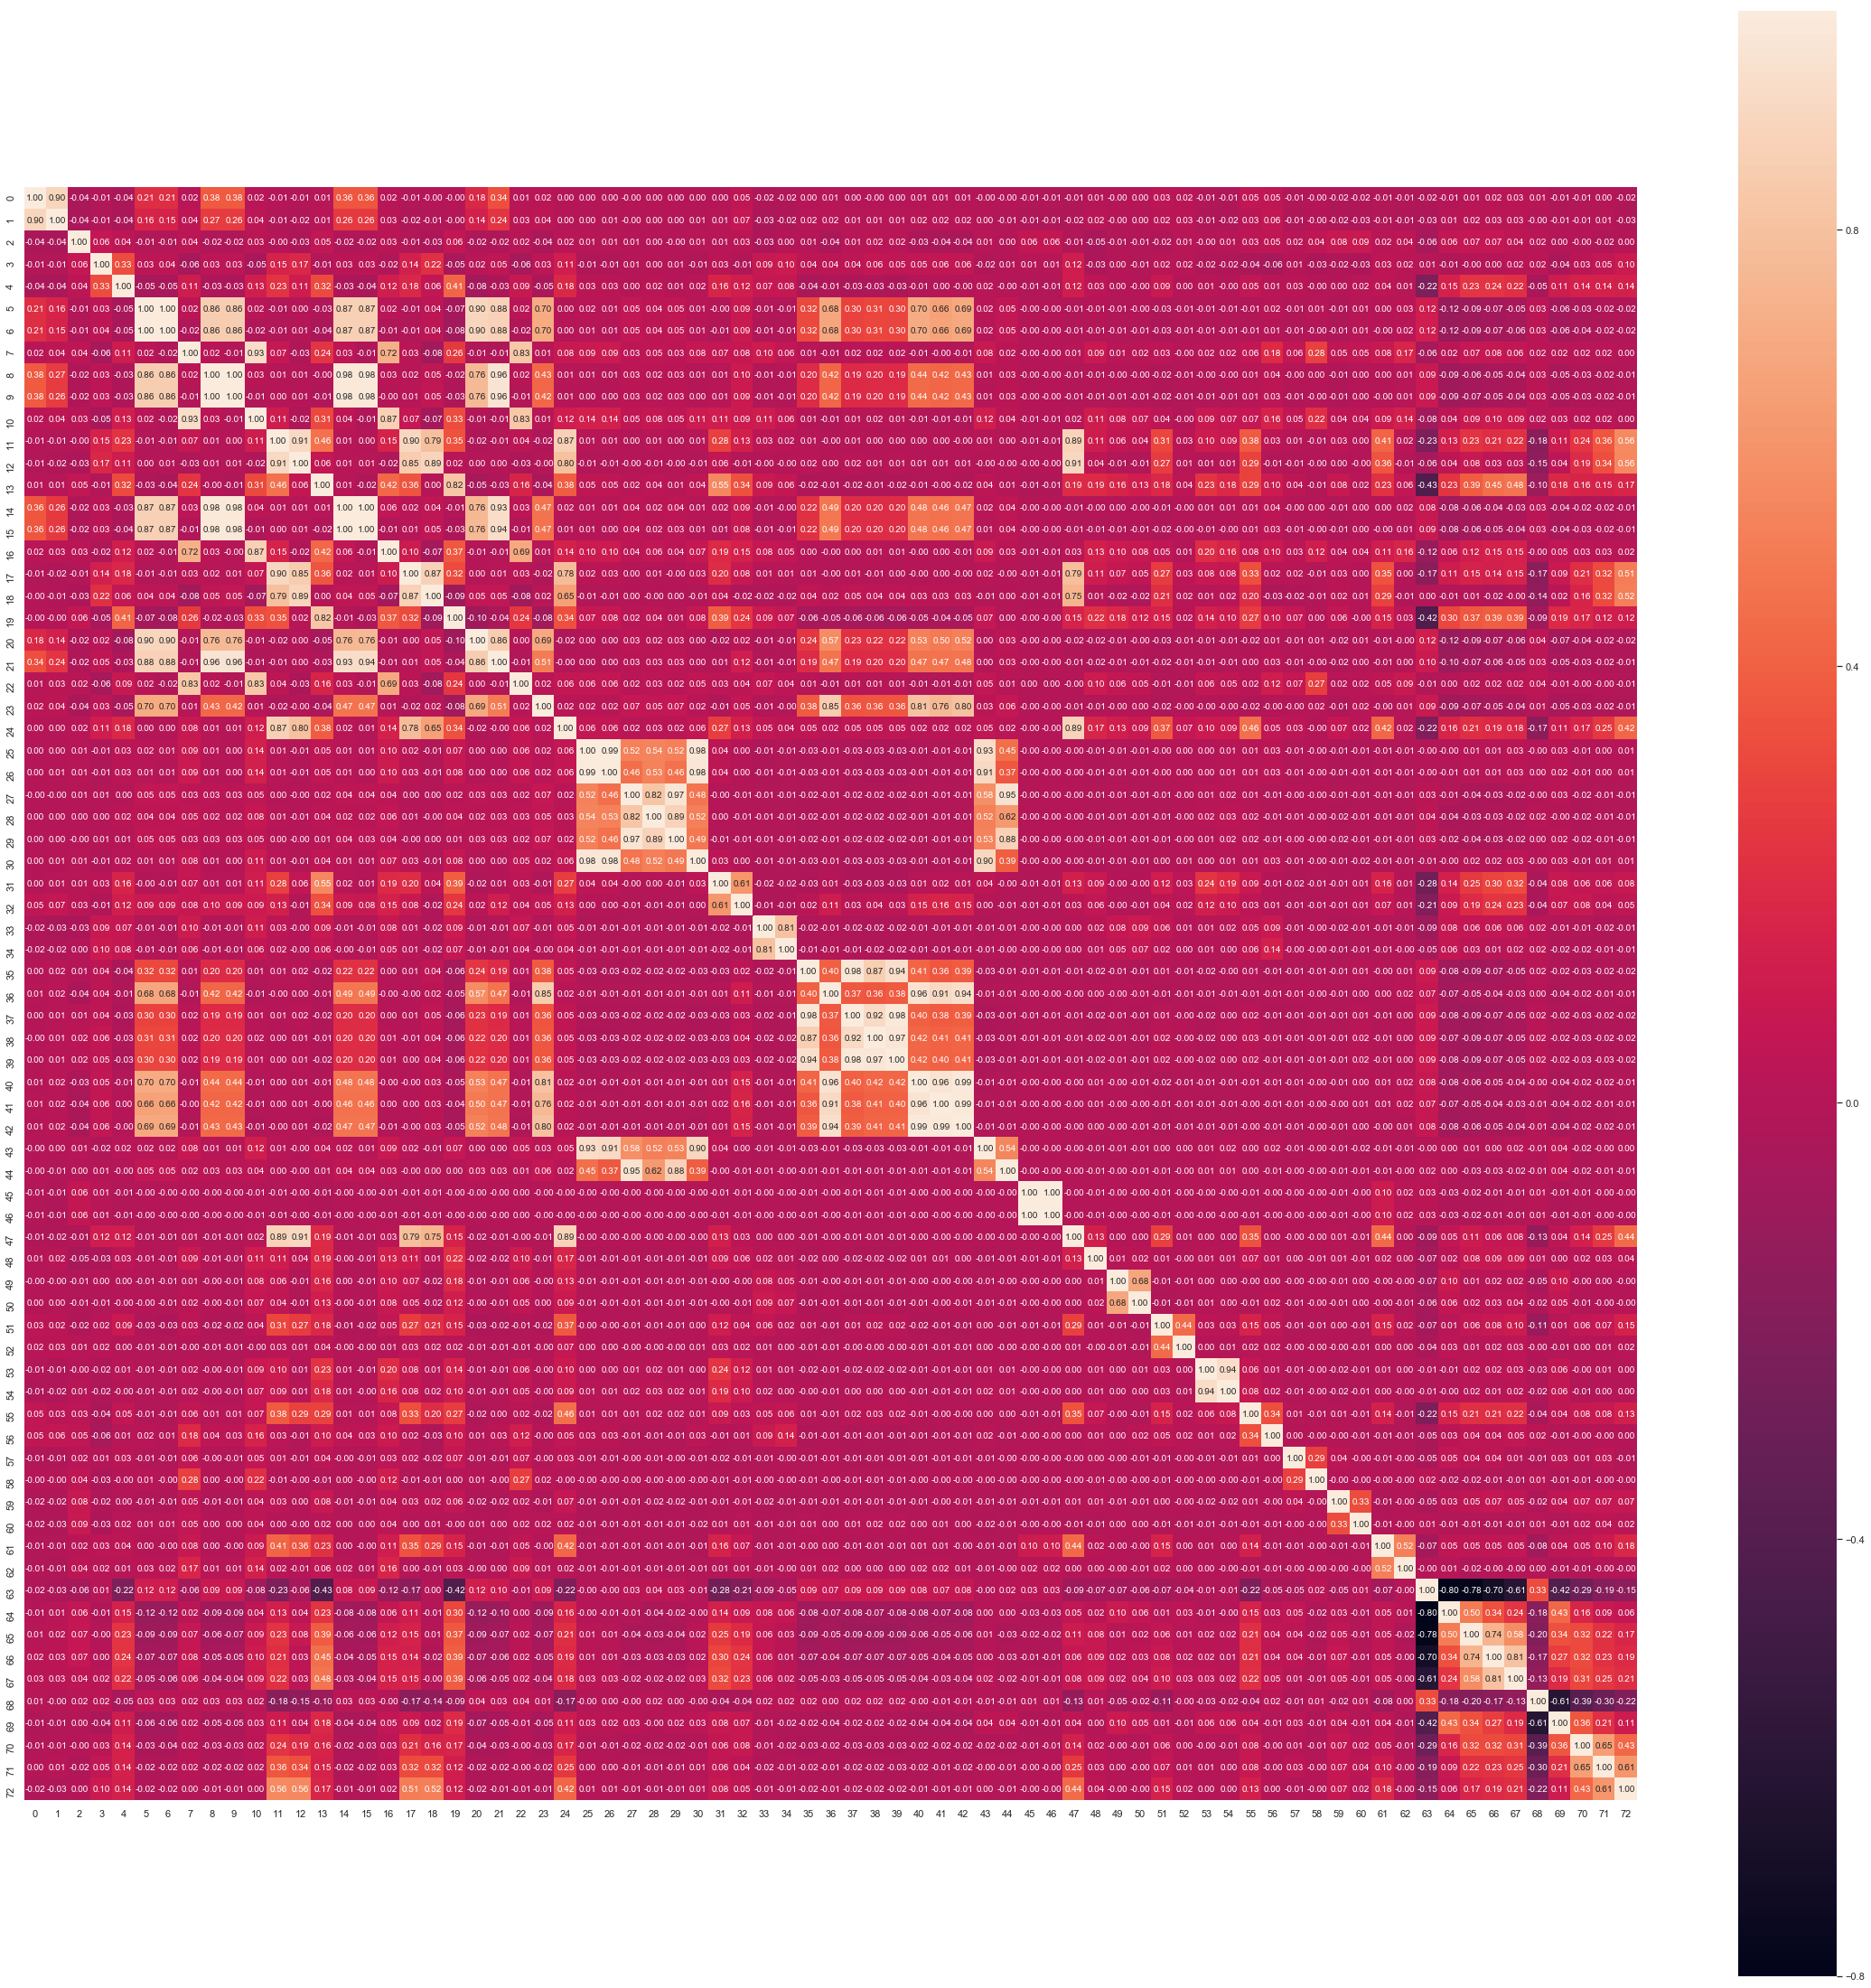

In [21]:
cols = expances.columns
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(40,40)})
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, xticklabels=cols, yticklabels=cols)
plt.savefig('figures/pearson')
plt.show()

In [23]:
print(columns[8] + ' ' + columns[21])

近1年月累计交易金额最大值 近1年借记卡月均交易金额


近一年月累计交易金额最大值比进一年消费总金额更有意义，因为大部分人每月赚的钱是一定的，而在大部分人都不经常用银联消费的情况下，数据中月消费金额的最大值代表了一个人在一个月可能消费的最大值，从而代表了一个人的消费能力

In [24]:
columns

Index(['最低报价', '中间报价', '年龄段', '借记卡数', '贷记卡数', '近1年单笔交易金额最大值',
       '近1年借记卡单笔交易金额最大值', '近1年贷记卡单笔交易金额最大值', '近1年月累计交易金额最大值',
       '近1年借记卡月累计交易金额最大值', '近1年贷记卡月累计交易金额最大值', '近1年消费总笔数', '近1年借记卡消费总笔数',
       '近1年贷记卡消费总笔数', '近1年消费总金额', '近1年借记卡消费总金额', '近1年贷记卡消费总金额', '近1年月均交易笔数',
       '近1年借记卡月均交易笔数', '近1年贷记卡月均交易笔数', '近1年月均交易金额', '近1年借记卡月均交易金额',
       '近1年贷记卡月均交易金额', '近6个月月均交易金额', '近6个月月均交易笔数', '近6个月汽车类月累计交易笔数最大值',
       '近6个月汽车类月累计交易笔数最小值', '近6个月汽车类月累计交易金额最大值', '近6个月汽车类月累计交易金额最小值',
       '近6个月汽车类月均交易金额', '近6个月汽车类月均交易笔数', '近6个月餐饮类交易笔数', '近6个月餐饮类交易金额',
       '近6个月珠宝类交易笔数', '近6个月珠宝类交易金额', '近6个月房地产类交易笔数', '近6个月房地产类交易金额',
       '近6个月房地产类月累计交易笔数最大值', '近6个月房地产类月累计交易笔数最小值', '近6个月房地产类月均交易笔数',
       '近6个月房地产类月累计交易金额最大值', '近6个月房地产类月累计交易金额最小值', '近6个月房地产类月均交易金额',
       '近6个月汽车销售类交易笔数', '近6个月汽车销售类交易金额', '近6个月公共学校类交易笔数', '近6个月公共学校类交易金额',
       '近6个月超市类交易笔数', '近6个月超市类交易金额', '近6个月大型家电专卖类交易笔数', '近6个月大型家电专卖类交易金额',
       '近6个月加油类交易笔数', '近6个月加油类交易金额', '近6个月保险类交易笔数', '近6个月保险类交易金额',
       '近6个月百货商店类交易笔

In [38]:
sns.reset_orig()  #将图片参数还原为初始值

#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

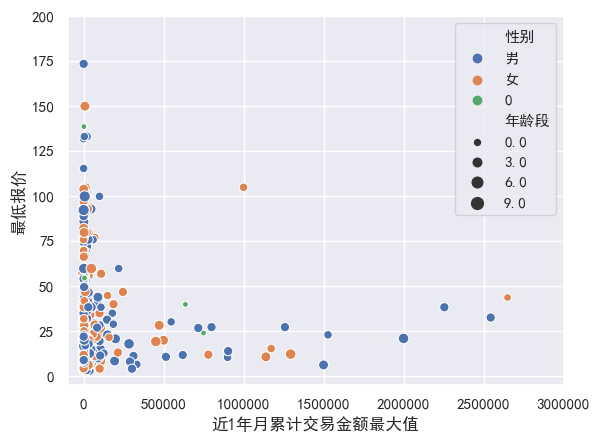

In [41]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

sns.scatterplot(x='近1年月累计交易金额最大值', y='最低报价', hue='性别', size='年龄段', data=expances);
#sns.set(rc={'figure.figsize':(50,8.27)})
#plt.axis([-20, 25000, -5, 200])
plt.axis([-100000, 3000000, -5, 200])
plt.savefig('figures/sex_age_')
plt.show()

多项式回归与线性回归的对比更改expances中的列名以查看不同属性对报价的预测结果

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = expances['近1年月累计交易金额最大值'].values.reshape(-1, 1)
#X = expances['中间报价'].values.reshape(-1, 1)
y = expances['最低报价'].values.reshape(-1, 1)
m = X.shape[0]

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

X_train, y_train = X[:m  // 4 * 3], y[:m // 4 * 3]
X_test, y_test = X[m  // 4 * 3 :] , y[m // 4 * 3 :]
X_quad_train, y_quad_train = X_quad[:m  // 4 * 3], y[:m // 4 * 3]
X_quad_test, y_quad_test = X_quad[m  // 4 * 3 :] , y[m // 4 * 3 :]

lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_train)

pr.fit(X_quad_train, y_quad_train)
y_pr_pred = pr.predict(X_quad_train)

'''
plt.scatter(X_train, y_train, label='training points')
plt.plot(X_train, y_lr_pred, label='linear fit', linestyle='--')
#plt.plot(X_train, y_pr_pred, label='quadratic fit')
plt.legend(loc='upper left')
#plt.axis([-20, 250000, -5, 200])
 
plt.tight_layout()
plt.show()
'''

"\nplt.scatter(X_train, y_train, label='training points')\nplt.plot(X_train, y_lr_pred, label='linear fit', linestyle='--')\n#plt.plot(X_train, y_pr_pred, label='quadratic fit')\nplt.legend(loc='upper left')\n#plt.axis([-20, 250000, -5, 200])\n \nplt.tight_layout()\nplt.show()\n"

使用测试集预测打印多项式拟合与普通线性拟合的均方误差和r^2得分
均方误差越低代表模型与数据拟合的越好
r^2得分介于-1与1之间，越接近1，拟合性越好

In [43]:
y_test_pred_pr = pr.predict(X_quad_test)
y_test_pred_lr = lr.predict(X_test)

print('Training MSE linear: %.3f, quadratic: %.3f' % (mean_squared_error(y_test, y_test_pred_lr),mean_squared_error(y_quad_test, y_test_pred_lr)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y_test, y_test_pred_pr),r2_score(y_quad_test, y_test_pred_pr)))


Training MSE linear: 5300.376, quadratic: 5300.376
Training R^2 linear: -0.073, quadratic: -0.073


In [44]:
y

array([[30.8],
       [ 8. ],
       [11.9],
       ...,
       [22. ],
       [66.3],
       [49.5]])

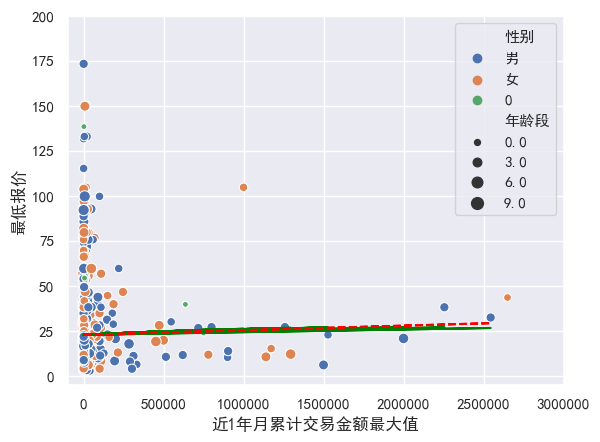

In [50]:
#为seaborn设置中文字体，没有下面两行的话seaborn和matplotlib作图不能显示中文
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

sns.scatterplot(x='近1年月累计交易金额最大值', y='最低报价', hue='性别', size='年龄段', data=expances);
#sns.set(rc={'figure.figsize':(50,8.27)})
#plt.axis([-20, 25000, -5, 200])
plt.axis([-100000, 3000000, -5, 200])
plt.plot(X_train, y_pr_pred, color='green', label='quadratic fit')
plt.plot(X_train, y_lr_pred, color='red', label='linear fit', linestyle='--')
plt.savefig('figures/sex_age_reg')
plt.show()

In [51]:
m

1237

In [52]:
X.shape

(1237, 1)

In [53]:
X_quad

array([[1.00000000e+00, 1.66000000e+03, 2.75560000e+06],
       [1.00000000e+00, 3.16663000e+03, 1.00275456e+07],
       [1.00000000e+00, 3.16010000e+03, 9.98623201e+06],
       ...,
       [1.00000000e+00, 9.00000000e+02, 8.10000000e+05],
       [1.00000000e+00, 1.66250000e+03, 2.76390625e+06],
       [1.00000000e+00, 3.51908000e+03, 1.23839240e+07]])

In [161]:
X_quad.shape

(1237, 3)

In [53]:
ml_data_final = pd.read_csv('ml_data_final', index_col='userid')
ml_data_final.columns

Index(['最低报价', '性别', '年龄段', '消费城市数量', '近1年月累计交易金额最大值'], dtype='object')

In [54]:
from sklearn.preprocessing import StandardScaler

f = '最低报价 ~ 性别 + 年龄段 + 消费城市数量 + 近1年月累计交易金额最大值'
y, X = patsy.dmatrices(f, ml_data_final, return_type='dataframe')

'''
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
'''

results = sm.OLS(y, X).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   最低报价   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.842
Date:                Wed, 21 Nov 2018   Prob (F-statistic):              0.120
Time:                        20:09:47   Log-Likelihood:                -2159.7
No. Observations:                 434   AIC:                             4329.
Df Residuals:                     429   BIC:                             4350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.6600      8.221      1.783

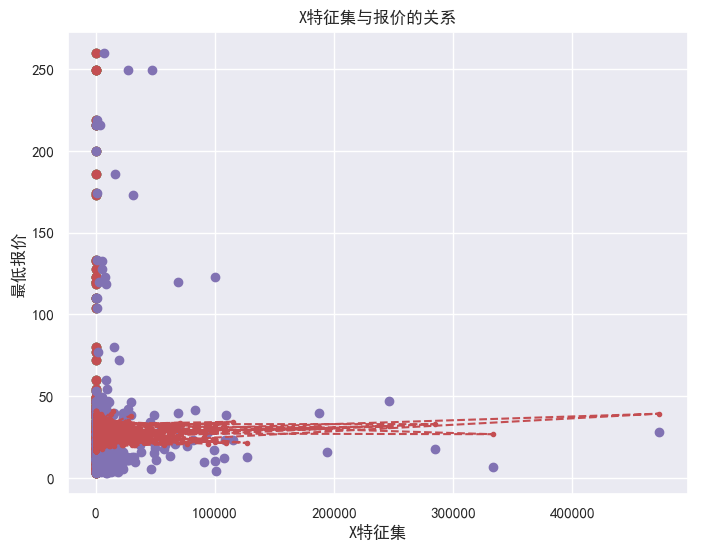

In [56]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X, y, 'o', label='data')
ax.plot(X, y_fitted, 'r--.',label='OLS')
ax.set(xlabel='X特征集', ylabel='最低报价', title='X特征集与报价的关系')
plt.savefig('figures/ols')
plt.show()

In [57]:
results.predict([1, 1, 1, 1, 100])
y_pred = results.predict(X)
r2_score = r2_score(y, y_pred)
r2_score

0.016883480308400145

In [57]:
import pickle

with open('ols_model.pickle', 'wb') as fw:
    pickle.dump(results, fw)